In [2]:
# Importar bibliotecas
import pandas as pd
import janitor
# Dados do IPCA (Sidra/IBGE)
dados_sidra = pd.read_json(
    path_or_buf = "https://apisidra.ibge.gov.br/values/t/7060/n1/all/v/all/p/all/c315/7169/d/v63%202,v66%204,v69%202,v2265%202?formato=json"
    )
# Dados de expectativas de inflação (Focus/BCB)
dados_focus = pd.read_csv(
  filepath_or_buffer = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoAnuais?%24filter=%28Indicador%20eq%20%27IPCA%27%20or%20Indicador%20eq%20%27IGP-M%27%29%20and%20Data%20ge%20%272022-01-01%27%20and%20Data%20le%20%272023-02-12%27&%24format=text/csv&%24orderby=Data%20desc",
  decimal = ","
  )

In [83]:
# Dados para exemplo 1: inflação medida pelo IPCA
tabela = (
 dados_sidra
 .rename(columns ={'V':'valor','D3C':'mes','D2N':'variavel'})
 .query("valor != 'Valor'")
 .filter(items = ["mes", "variavel", "valor"]) 
)
df=pd.DataFrame(tabela)
df['mes']=pd.to_datetime(df['mes'],format='%Y%m')
df=df.set_index(['mes']).copy()

df.valor=pd.to_numeric(df.valor,errors='coerce')
df=df.dropna()
df.query('index >= "2020-01-01" and index <="2020-05-01"')


,variavel,valor
mes,,
2020-01-01,IPCA - Variação mensal,0.21
2020-02-01,IPCA - Variação mensal,0.25
2020-03-01,IPCA - Variação mensal,0.07
2020-04-01,IPCA - Variação mensal,-0.31
2020-05-01,IPCA - Variação mensal,-0.38
2020-01-01,IPCA - Variação acumulada no ano,0.21
2020-02-01,IPCA - Variação acumulada no ano,0.46
2020-03-01,IPCA - Variação acumulada no ano,0.53
2020-04-01,IPCA - Variação acumulada no ano,0.22


<Axes: xlabel='mes'>

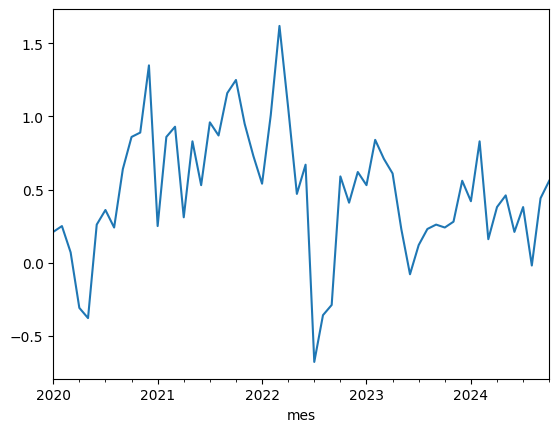

In [ ]:
#tranform long for wide
table_pivot=tabela.pivot(index='mes',columns='variavel',values='valor').filter(items=['IPCA - Variação mensal'])
table_pivot.index=pd.to_datetime(table_pivot.index,format='%Y%m')

table_pivot=pd.to_numeric(table_pivot['IPCA - Variação mensal'])
table_pivot.plot()

<Axes: xlabel='Data'>

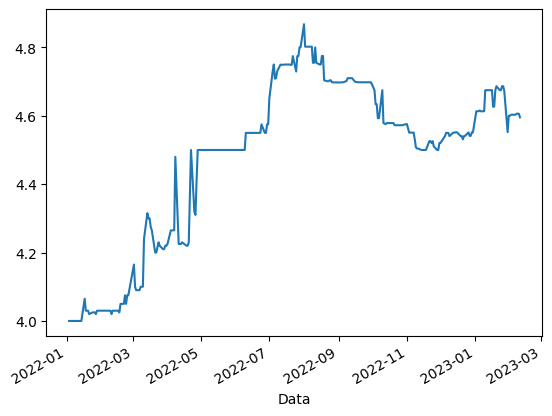

In [123]:
#Tranform wide for long
data=(dados_focus.query('DataReferencia in [2022,2023] and baseCalculo ==0')
      .pivot(index=['Indicador','Data'],columns='DataReferencia',values='Mediana').reset_index())
data_igpM=data.query('Indicador =="IGP-M"')
data_igpM=data_igpM.set_index(data_igpM['Data'])

df_igpM=pd.DataFrame(data_igpM)
df_igpM.index=pd.to_datetime(df_igpM.index)
#df_igpM['2022','2023'].plot(figsize=(10, 6), title='Indicadores de 2022 e 2023')
import janitor
df_igpM = df_igpM.clean_names()
df_igpM=df_igpM.rename(columns={'2022':'ano_2022','2023':'ano_2023'})
df_igpM['ano_2023'].plot()

In [93]:
#Formato long: para quando cada linha representa mais de uma observação
data_melt=data.melt(
    id_vars=['Indicador','Data'],
    value_vars=[2022,2023],
    var_name='data_Ref',
    value_name='Mediana'
    
)
data_melt

,Indicador,Data,data_Ref,Mediana
0,IGP-M,2022-01-03,2022,5.4819
1,IGP-M,2022-01-04,2022,5.4926
2,IGP-M,2022-01-05,2022,5.4873
3,IGP-M,2022-01-06,2022,5.4873
4,IGP-M,2022-01-07,2022,5.5600
...,...,...,...,...
1119,IPCA,2023-02-06,2023,5.7759
1120,IPCA,2023-02-07,2023,5.7828
1121,IPCA,2023-02-08,2023,5.7828
1122,IPCA,2023-02-09,2023,5.7762


In [41]:
table_pivot.columns = table_pivot.columns.str.strip()  # Remover espaços extras


In [42]:
table_pivot.plot(
    y='IPCA - Variação mensal', 
    title='IPCA - Variação Mensal', 
    legend=True,
    ylabel='Variação (%)',
    xlabel='Data'
)


TypeError: no numeric data to plot

In [43]:
# Garantir que a coluna tenha o nome correto
table_pivot.columns = table_pivot.columns.str.replace(' ', '')  # Remover espaços extras


In [44]:
table_pivot.plot(
    y='IPCA - Variação mensal', 
    title='IPCA - Variação Mensal', 
    legend=True,
    ylabel='Variação (%)',
    xlabel='Data'
)


KeyError: 'IPCA - Variação mensal'